<a href="https://colab.research.google.com/github/rsguevaraa/intro-met-comp/blob/main/Sesion4_Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 4: Análisis de datos

El objetivo de la sesión es proveer con técnicas básicas de procesamiento y análisis de datos. Como se ha mencionada previamente, los tipos de datos son múltiples así que esta sesión estará dedicada al análisis de texto. Para ello utilizaremos Procesamiento de Lenguaje Natural - Natural Language Processing (NLP)-.

La sesión estará dividida en cuatro secciones:
1. Estructuración de los datos recogidos
2. Limpieza de datos
3. Análisis de datos
4. Visualización de datos


# Sección 1: Estructuración de datos

Esta sección está dedicada a la estructuración de datos, es decir, cómo transformar la data, que se encuentra en formato html y/o JSON, en objetos tales come listas y/o matrices que faciliten el análisis. Para ello, utilizaremos la data extraída anteriormente.
  

En la sesión anterior, obtuvimos información de Wikipedia y del diario Correo en un archivo HTML y '.csv', respectivamente. Estos archivos, que se encuentran en nuestro disco local (computadora), tenemos que "cargarlos" a nuestro ambiente en Google Colab.

Para ello, debemos dirigirnos a la barra izquierda de nuestro Colab y ubicar el ícono de un "archivo" y darle click. En el ubicaremos en la parte superior del menú, un ícono para cargar archivos desde nuestro disco local.

## 1.1. Estructurar datos extraídos de Wikipedia

In [ ]:
# Primero importemos BeautifulSoup para poder analizar el archivo en HTML de la sesión anterior.
from bs4 import BeautifulSoup

# Utilizamos la funcion open para abrir el archivo en html que descargamos ayer y lo guardamos en un objeto llamado "CAI_pagina"
with open('CAI_Peru_Wikipedia-2.html', 'r', encoding='utf-8') as file:
    CAI_pagina = file.read()

# Verificamos el contenido del objeto
print(CAI_pagina)

<div class="mw-content-ltr mw-parser-output" lang="es" dir="ltr"><table style="" class="noprint plainlinks ambox ambox-content">
<tbody><tr>
<td class="ambox-image" width="40">
<span class="mw-default-size" typeof="mw:File"><a href="/wiki/Archivo:Commons-emblem-scales.svg" class="mw-file-description"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Commons-emblem-scales.svg/40px-Commons-emblem-scales.svg.png" decoding="async" width="40" height="40" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Commons-emblem-scales.svg/60px-Commons-emblem-scales.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Commons-emblem-scales.svg/80px-Commons-emblem-scales.svg.png 2x" data-file-width="48" data-file-height="48" /></a></span></td>
<td class="ambox-text"><div class="ambox-text-div"><strong>Existen desacuerdos sobre la <a href="/wiki/Wikipedia:Punto_de_vista_neutral" title="Wikipedia:Punto de vista neutral">neutralidad en el p

Nuestro archivo HTML tiene mucho información por lo que tenemos que definir cuáles son los elementos con los que vamos a trabajar.

Para este caso, trabajaremos con el texto de los párrafos de la página de Wikipedia extraída. Si hacemos un análisis de la página, veremos que la mayor cantidad de texto que nos interesa se encuentra categorizada con las etiquetas HTML < a > y < p >.




*   La etiqueta < a > refiere a texto que contiene enlaces a otros sitios web (hipervinculos). Esto es muy común en las páginas de Wikipedia, ya que estas contienen enlaces a otras páginas de Wikipedia.
*   La etiqueta < p > refiere a párrafos, es decir al texto que se encuentra en párrafos.

Estos dos elementos son los que nos interesa extraer para poder realizar el análisis.



In [ ]:
# Utilizamos el comando BeautifulSoup para poder convertir nuestro archivo HTML en un objeto BS
# lo que nos permitirá navegar por su estructura con mayor facilidad
objeto_bs = BeautifulSoup(CAI_pagina, 'html.parser')

# Creamos dos listas una que contenga los elementos <a> y otra que contenga los elementos <p>
# Cada lista va a contenter un conjunto de diccionarios que indique dos elementos:
# Elemento 1: 'etiqueta' y esta tendrá siempre el valor de 'a' (en caso sea extraido de un hipervínculo) o 'p' (en caso sea extraido de un párrafo)
# Elemento 2: 'texto' , es decir el texto extraido de estos elementos.

# Lista 1: Lista con elementos 'a': va a contenter todos los elementos extraidos de 'a' = enlaces (achor)
textos_a = [{'etiqueta': 'a', 'texto': a.get_text()} for a in objeto_bs.find_all('a')]

# Lista 2: Lista con elementos 'p': va a contener todos los elementos extraídos de 'p' = párrafos
textos_p = [{'etiqueta': 'p', 'texto': p.get_text()} for p in objeto_bs.find_all('p')]

print(textos_a) # print(textos_p)

[{'etiqueta': 'a', 'texto': ''}, {'etiqueta': 'a', 'texto': 'neutralidad en el punto de vista'}, {'etiqueta': 'a', 'texto': 'ver la discusión.'}, {'etiqueta': 'a', 'texto': 'la página de discusión'}, {'etiqueta': 'a', 'texto': 'Insurgencia narcoterrorista en el Perú'}, {'etiqueta': 'a', 'texto': 'fusionado'}, {'etiqueta': 'a', 'texto': 'página de discusión'}, {'etiqueta': 'a', 'texto': 'aquí'}, {'etiqueta': 'a', 'texto': 'Historia del Perú entre 1980 y 2000'}, {'etiqueta': 'a', 'texto': ''}, {'etiqueta': 'a', 'texto': 'Sendero Luminoso'}, {'etiqueta': 'a', 'texto': '[a]'}, {'etiqueta': 'a', 'texto': ''}, {'etiqueta': 'a', 'texto': 'Perú'}, {'etiqueta': 'a', 'texto': 'redes de contacto y operaciones internacionales'}, {'etiqueta': 'a', 'texto': 'Coordenadas'}, {'etiqueta': 'a', 'texto': '9°24′S 76°00′O\ufeff / \ufeff-9.4, -76'}, {'etiqueta': 'a', 'texto': 'Casus belli'}, {'etiqueta': 'a', 'texto': 'Ruptura sino-soviética'}, {'etiqueta': 'a', 'texto': 'revolución cubana'}, {'etiqueta': '

In [ ]:
# Combinamos las dos listas en un mismo objeto llamado textos_CAI
textos_CAI = textos_a + textos_p
print(textos_CAI) # Lista que contiene ambos elementos

[{'etiqueta': 'a', 'texto': ''}, {'etiqueta': 'a', 'texto': 'neutralidad en el punto de vista'}, {'etiqueta': 'a', 'texto': 'ver la discusión.'}, {'etiqueta': 'a', 'texto': 'la página de discusión'}, {'etiqueta': 'a', 'texto': 'Insurgencia narcoterrorista en el Perú'}, {'etiqueta': 'a', 'texto': 'fusionado'}, {'etiqueta': 'a', 'texto': 'página de discusión'}, {'etiqueta': 'a', 'texto': 'aquí'}, {'etiqueta': 'a', 'texto': 'Historia del Perú entre 1980 y 2000'}, {'etiqueta': 'a', 'texto': ''}, {'etiqueta': 'a', 'texto': 'Sendero Luminoso'}, {'etiqueta': 'a', 'texto': '[a]'}, {'etiqueta': 'a', 'texto': ''}, {'etiqueta': 'a', 'texto': 'Perú'}, {'etiqueta': 'a', 'texto': 'redes de contacto y operaciones internacionales'}, {'etiqueta': 'a', 'texto': 'Coordenadas'}, {'etiqueta': 'a', 'texto': '9°24′S 76°00′O\ufeff / \ufeff-9.4, -76'}, {'etiqueta': 'a', 'texto': 'Casus belli'}, {'etiqueta': 'a', 'texto': 'Ruptura sino-soviética'}, {'etiqueta': 'a', 'texto': 'revolución cubana'}, {'etiqueta': '

In [ ]:
# Utilizamos la libreria pandas para transformar nuestra lista en una matriz que se llamará df_CAI
import pandas as pd
df_CAI = pd.DataFrame(textos_CAI)

print(df_CAI)
# Ahora podemos observar que tenemos 2 columnas: 1) etiqueta: indica que tipo de elemento es
# 2) texto: que contiene el texto extraido

     etiqueta                                              texto
0           a                                                   
1           a                   neutralidad en el punto de vista
2           a                                  ver la discusión.
3           a                             la página de discusión
4           a             Insurgencia narcoterrorista en el Perú
...       ...                                                ...
2094        p  Los eventos de desaparición ocurrieron casi de...
2095        p  La primera propuesta de establecimiento de un ...
2096        p  Existen distintos monumentos y memoriales refe...
2097        p  Se han establecido varias distinciones a los m...
2098        p  Existen varios monumentos públicos respecto de...

[2099 rows x 2 columns]


## 1.2. Estructurar datos extraídos de la página web del Correo

La estructuración de los datos (titulares) extraídos de la web Correo no necesitan mayor modificación ya que al momento de la extracción ya los hemos ordenado en una matriz. Por ello, solamente debemos cargar el archivo a nuestro ambiente de trabajo para poder trabajar con ellos.

In [2]:
# Cargar la base de datos con 150 noticias de correo
correo_df = pd.read_csv('correo_df-2.csv')
print(correo_df)

                                               titular
0    Edmundo González Urrutia aclara que no fue coa...
1    Venezuela pedirá arresto de Milei por caso de ...
2    Palpa: extranjero atacó con un fierro a su com...
3    Gobierno de Venezuela arrestó a un cuarto esta...
4    Cuerpo hallado en el mar de Arequipa, sería de...
..                                                 ...
145  TODA TIRANÍA TIENE IDEOLOGÍA, columna de Martí...
146  OEA pedirá a la Corte Penal Internacional el a...
147  Trujillo: Empresario dispara contra presuntos ...
148  Intervienen a mujer que amenazaba con un cuchi...
149  Nicolás Maduro sobre Edmundo González y María ...

[150 rows x 1 columns]


# Sección 2: Limpieza de datos

En esta sección utilizaremos distintas técnicas de "normalización de texto" para limpiar los titulares obtenidos.

Hay dos formas de realizar la limpieza de datos:
1. Creando funciones desde cero para limpiar el texto
2. Usar una modelo previamente entrenado que realice las labores de limpieza.

Trabajaremos con el [modelo de Spacy](https://spacy.io/models/es) entrenado en noticias de idioma español. Eso nos permitirá usar sus funciones de normalización de texto tales como:

* Tokenización del texto por palabras
* Transformar el texto en minúscula
* Remover puntuación
* Remover "stopwords"
* Lemmatización



In [ ]:
# Instalemos la libreria de spacy
!pip install spacy

In [3]:
# Importamos spacy
import spacy

In [5]:
# Descargamos el modelo de Spacy para español
# OJO: usualmente spacy solo debería instalarse una ves, pero en Google Colab tienen que instalarlo siempre que lo utilicen
# Si lo usan en una IDE en su computadora solo bastara descargarlo una ves y luego solo cargarlo.

spacy.cli.download("es_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Técnica 1: Transformación del texto a minúscula (lowercasing)

In [6]:
# Cargar el modelo descargado en el objeto "nlp"
nlp = spacy.load("es_core_news_sm")

In [7]:
# Creamos un texto de prueba
texto_prueba = "HOLA COMO ESTÁN"
texto_prueba.lower()

'hola como están'

In [8]:
# Técnica 1: Transformar texto en minúscula
correo_df['titular_minuscula'] = correo_df['titular'].str.lower() #crea una nueva columna con el texto en minuscula
correo_df.head(2) #mostrar 2 primeras filas

,titular,titular_minuscula
0,Edmundo González Urrutia aclara que no fue coa...,edmundo gonzález urrutia aclara que no fue coa...
1,Venezuela pedirá arresto de Milei por caso de ...,venezuela pedirá arresto de milei por caso de ...


## Técnica 2: Eliminar puntuación

In [9]:
# Técnica 2: Eliminar la puntuación

# Crearemos una función para remover la puntuación
# En esta función Spacy 1) primero tokeniza los titulares en palabras (lo divide en palabras)
# 2) Luego va por cada token y remueve aquellos que son puntuaciones
# 3) lo almacena en en objeto temporal llamado texto limpio
# 4) junta (join) los tokens en un texto de corrido (lo devuelve a su estado de oración)

def remover_puntuacion(text):
  doc = nlp(text) #activamos spacy
  texto_limpio = [token.text if not token.is_punct else ' ' for token in doc]
  return ' '.join(texto_limpio)

# Aplicamos la función a nuestra base de datos
correo_df['titular_sin_puntuacion'] = correo_df['titular_minuscula'].apply(remover_puntuacion)
correo_df.head(10)

,titular,titular_minuscula,titular_sin_puntuacion
0,Edmundo González Urrutia aclara que no fue coa...,edmundo gonzález urrutia aclara que no fue coa...,edmundo gonzález urrutia aclara que no fue coa...
1,Venezuela pedirá arresto de Milei por caso de ...,venezuela pedirá arresto de milei por caso de ...,venezuela pedirá arresto de milei por caso de ...
2,Palpa: extranjero atacó con un fierro a su com...,palpa: extranjero atacó con un fierro a su com...,palpa extranjero atacó con un fierro a su co...
3,Gobierno de Venezuela arrestó a un cuarto esta...,gobierno de venezuela arrestó a un cuarto esta...,gobierno de venezuela arrestó a un cuarto esta...
4,"Cuerpo hallado en el mar de Arequipa, sería de...","cuerpo hallado en el mar de arequipa, sería de...",cuerpo hallado en el mar de arequipa sería d...
5,"Cae “Chuy”, quien sería el asesino de una abog...","cae “chuy”, quien sería el asesino de una abog...",cae chuy quien sería el asesino de una a...
6,José Luis Rodríguez brindará concierto en Truj...,josé luis rodríguez brindará concierto en truj...,josé luis rodríguez brindará concierto en truj...
7,Chincha: asesinan de un disparo a extranjero e...,chincha: asesinan de un disparo a extranjero e...,chincha asesinan de un disparo a extranjero ...
8,Madre de Katherine Gómez sobre sentencia de 26...,madre de katherine gómez sobre sentencia de 26...,madre de katherine gómez sobre sentencia de 26...
9,Sergio Tarache es condenado a 26 años de prisi...,sergio tarache es condenado a 26 años de prisi...,sergio tarache es condenado a 26 años de prisi...


## Técnica 3: Remover Stopwords


In [10]:
# Técnica 3: Remover "stopwords"

# Definimos una función que remueva "stopwords"
# Esta función tiene la misma lógica que la anterior, 1) tokeniza el texto
# 2) luego remueve aquellos tokens (palabras) que no estén en el diccionario definido por Spacy
# 3) Une los tokens en una oración

def remover_stopwords(text):
  doc = nlp(text)
  texto_limpio = [token.text for token in doc if not token.is_stop and not token.is_punct]
  return ' '.join(texto_limpio)

# Aplicamos la función
correo_df['titular_sin_stopwords'] = correo_df['titular_sin_puntuacion'].apply(remover_stopwords)
correo_df.iloc[0,3]

'edmundo gonzález urrutia aclara coaccionado gobierno españa exilio'

In [ ]:
# Si queremos ver cuáles son las palabras definidas como "stopwords" podemos revisar el diccionario de Spacy
nlp.Defaults.stop_words

{'a',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contigo',
 'contra',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 'cuando',
 'cuanta',
 'cuantas',
 'cuanto',
 'cuantos',
 'cuatro',
 'cuenta',
 'cuál',
 'cuáles',
 'cu

In [11]:
# Si quisieramos excluir  la palabra "buenos" del diccionario de stopwords, entonces podeos aplicar el sgt código
nlp.vocab['buenos'].is_stop = False

In [12]:
# Pero si quisieras excluir más de una palabra el método anterior no funcionará:
#nlp.vocab['bueno','buena','buenos','buenas'].is_stop = False

# Spacy espera solo un "token" (una palabra), por ende el codigo que deberan utilizar es el siguiente:
palabras_eliminar = ['bueno', 'buena', 'buenos', 'buenas']

# For loop para excluir todas las palabras seleccionadas del diccionario de stopwords
for palabra in palabras_eliminar:
    nlp.vocab[palabra].is_stop = False

In [13]:
# Comprobemos en un texto de prueba random
texto_prueba = "los buenos hijos del señor prometen no ser buenos en la ejecucción de la canción"

remover_stopwords(texto_prueba) # Sí funciona ahora tenemos a "buenos" luego de aplicar la función

'buenos hijos señor prometen buenos ejecucción canción'

In [14]:
# Re-apliquemos a todo nuestro corpus
correo_df['titular_sin_stopwords'] = correo_df['titular_sin_puntuacion'].apply(remover_stopwords)

## Técnica 4: Lematización

El proceso de lematización sirve para transformar las palabras a su forma base (llamado "lema"). Este proceso no siempre se aplica, depende del tipo de análisis que se quiera realizar.

In [15]:
# Definimos una funcion para lematizar
def lematizar(text):
  doc = nlp(text)
  texto_limpio = [token.lemma_ for token in doc]
  return " ".join(texto_limpio)

# Aplicar la función
correo_df['titular_lematizado'] = correo_df['titular_sin_stopwords'].apply(lematizar)
correo_df.iloc[0,3:5]

,0
titular_sin_stopwords,edmundo gonzález urrutia aclara coaccionado go...
titular_lematizado,edmundo gonzález urrutia aclar coaccionado gob...


## Juntar todo el proceso de normalización en una sola función

In [ ]:
def normalizar_texto(text):
  doc = nlp(text) #activar spacy
  text = text.lower() # volver el texto a minuscula
  text = ' '.join([token.text if not token.is_punct else ' ' for token in doc]) # eliminar puntuación
  text = ' '.join([token.text for token in doc if not token.is_stop and not token.is_punct]) # eliminar stop words
  return " ".join(token.lemma_ for token in doc if not token.is_stop and not token.is_punct) # lematizar

# Aplicar al texto
correo_df['titular_limpio'] = correo_df['titular'].apply(normalizar_texto)
correo_df.head(2)

# Si observamos el output del primer titular, en la columna "titular minuscula" figura como "edmundo gonzález"
# cuando en la variable "titular limpio" figura como "edmundo González". Esto se debe a que Spacy está reconociendo
# "González" como nombre propio mas no "Edmundo". Por ello las diferencias.

,titular,titular_minuscula,titular_sin_puntuacion,titular_sin_stopwords,titular_lematizado,titular_limpio
0,Edmundo González Urrutia aclara que no fue coa...,edmundo gonzález urrutia aclara que no fue coa...,edmundo gonzález urrutia aclara que no fue coa...,edmundo gonzález urrutia aclara coaccionado go...,edmundo gonzález urrutia aclar coaccionado gob...,edmundo González Urrutia aclarar coaccionar Go...
1,Venezuela pedirá arresto de Milei por caso de ...,venezuela pedirá arresto de milei por caso de ...,venezuela pedirá arresto de milei por caso de ...,venezuela pedirá arresto milei caso avión inca...,venezuela pedir arresto milei caso avión incau...,Venezuela pedir arresto Milei caso avión incau...


# Sección 3: Análisis de datos

En esta sección realizaremos un conteo simple de palabras y entrenaremos un modelo Word2vec para medir asociación semántica entre palabras.

## 3.1. Análisis descriptivo

In [ ]:
# Conteo de palabras
correo_df['titular_limpio'].str.split(expand=True).stack().value_counts().head(30)

,count
Venezuela,32
Maduro,21
Nicolás,18
González,16
columna,15
Fujimori,14
Alberto,11
venezolano,11
Arequipa,11
María,10


In [ ]:
# Instalar librería Gensim
!pip install gensim

## 3.2. Entrenando un modelo de Word embeddings (Word2vec)

In [ ]:
#Dividir los titulares por tokens (palabras)
correo_df_lista = correo_df['titular_limpio'].str.split().tolist()
correo_df_lista[2:5]

[['Palpa', 'extranjero', 'atacar', 'fierro', 'compatriota', 'borde', 'muerte'],
 ['Gobierno',
  'Venezuela',
  'arrestar',
  'cuarto',
  'estadounidense',
  'plan',
  'Nicolás',
  'Maduro'],
 ['cuerpo',
  'hallado',
  'mar',
  'Arequipa',
  'joven',
  'pescador',
  'pisqueño',
  'desaparecido']]

In [ ]:
# Entrenar el modelo
from gensim.models import Word2Vec

modelo = Word2Vec(correo_df_lista, # input del modelo para entrenarlo
                  vector_size=100, # de que tamaño sera la representacion de cada palabra
                  window=5,  # numero de palabras de contexto de las cuales se van a contar
                  min_count=1, # numero minimo de veces que la palabra debe estar presente en el texto para ser incluida en el modelo
                  sg=1) # 0 = CBOW , 1= Skip gram

In [ ]:
# TOP 10 Palabras más similares a "venezolano"
modelo.wv.most_similar('venezolano', topn=10)

[('bala', 0.3503913879394531),
 ('Jayanca', 0.3391050398349762),
 ('Brasil', 0.31866100430488586),
 ('Carretera', 0.29959726333618164),
 ('afiliado', 0.2929340898990631),
 ('3', 0.2744062840938568),
 ('desaparecido', 0.2680801749229431),
 ('Kenji', 0.2606315612792969),
 ('paradero', 0.255534827709198),
 ('Nicolás', 0.25283634662628174)]

## Ejercicio 1:  ¿Cómo analizarían los datos de Wikipedia para responder a la pregunta que tenemos?

In [ ]:
# Definir una función para contar palabras
def contar_palabras(df, palabra):
  palabra = palabra.lower()

  #Contar las palabras
  palabras_contadas = df['texto'].str.lower().str.count(palabra).sum()
  return palabras_contadas

terrorismo_numero = contar_palabras(df_CAI, 'terrorismo')
print({'Número de veces que se enuncia "terrorismo" en la página', terrorismo_numero})


{59, 'Número de veces que se enuncia "terrorismo" en la página'}


In [ ]:
CAI_numero = contar_palabras(df_CAI, 'conflicto armado interno')
print({'Número de veces que se enuncia "conflicto armado interno" en la página', CAI_numero})

{'Número de veces que se enuncia "conflicto armado interno" en la página', 21}


# Sección 4: Visualización de datos

Para esta sección utilizaremos el Tema 1 (establecido la semana pasada) para ver cómo es que cambian en el tiempo los conceptos de "terrorismo" y "Conflicto Armado Interno". En este caso, nos centraremos en cómo cambia la cantidad de texto en la página a través del tiempo, lo cual quiere decir, la importancia que se le va dando al tema a través del tiempo.

In [ ]:
# Importar librerias
import requests

# Copiamos el código de la sesión de ayer para extraer el historial
def extraer_historial_revision_df(titulo):
  url = "https://es.wikipedia.org/w/api.php"
  parametros = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "titles": titulo,
        "rvprop": "timestamp|user|comment|ids|size",
        "rvlimit": "max",
        "rvdir": "newer"
  }

  # Paso 2: Conectar con la API
  respuesta = requests.get(url, params=parametros)
  data = respuesta.json()

  # Paso 3: Extraer las listas en format json
  paginas = data.get('query', {}).get('pages', {}) # creamos un diccionario llamado paginas que busca dentro del campo "query" y "pages" del output en formato JSON
  revisiones_por_pagina = [] #creamos una lista vacia para almacenar la información que extraeremos de la respuesta en JSON obtenida

  # Paso 4: Crear un loop que extraiga todas las revisiones por página
  # Cada página posee un identificador único (ID) y tiene la info requerida (información de las revisiones)
  # lo que hace el loop es primero buscar si es que existe el parametro "revisions" (si está presente, significa que hay revisión) en la informacion de la pagina:
  # y si es que está presente, entonces extrae la información ("revisions") y las almacena en la lista vacia "revisiones_por_pagina"
  for id_pagina, info_pagina in paginas.items():
    if "revisions" in info_pagina: # condicional que verifica si es que la pagina tiene revisiones, si cumple con ello, aplica el siguiente código
      revisiones_por_pagina = info_pagina["revisions"] #si la pagina tiene revisiones, añade esas revisiones a la lista vacia "revisiones_por_pagina"

  # Paso 5: Crear una lista completa de revisiones
  lista_completa_revisiones = [] # Lista vacia para almacenar las revisiones

  # Paso 6: Loop que vaya por cada revision y extraiga cada una de las siguientes variables (revid, timestamp, etc.)
  # y lo añada a un nuevo objeto llamado "data_revisiones" que tendra cada revision con sus respectivas variables
  for cada_revision in revisiones_por_pagina:
    data_revisiones = {
        "revid": cada_revision.get("revid"),
        "parentid": cada_revision.get("parentid"),
        "timestamp": cada_revision.get("timestamp"),
        "user": cada_revision.get("user"),
        "size": cada_revision.get("size"),
        "comment": cada_revision.get("comment")
    }
    lista_completa_revisiones.append(data_revisiones) #añadir estas variables a la lista vacia que creamos anteriormente

  # Paso 7: Convertir la lista de revisiones en una base de datos (matriz). Para ello usaremos la libreria pandas
  base_datos = pd.DataFrame(lista_completa_revisiones)

  return base_datos

# Debemos importar la libreria pandas para la ultima parte de la funcion
import pandas as pd

# Aplicar la función creada
wikipedia_df = extraer_historial_revision_df("Época del terrorismo en el Perú")

#El resultado son 500 revisiones distintas...

In [ ]:
print(wikipedia_df)

        revid  parentid             timestamp  \
0    12620573         0  2007-11-06T18:00:19Z   
1    12620598  12620573  2007-11-06T18:01:08Z   
2    12620620  12620598  2007-11-06T18:01:39Z   
3    12620862  12620620  2007-11-06T18:09:45Z   
4    12620891  12620862  2007-11-06T18:10:43Z   
..        ...       ...                   ...   
495  88185134  88185007  2016-01-03T04:11:38Z   
496  88190736  88185134  2016-01-03T13:37:48Z   
497  88312615  88190736  2016-01-08T20:40:48Z   
498  88328051  88312615  2016-01-09T14:30:48Z   
499  88539656  88328051  2016-01-18T19:47:33Z   

                                        user   size  \
0                                  Jorgejhms   1627   
1                                  Jorgejhms   1626   
2                                  Jorgejhms   1624   
3                                  Jorgejhms   2093   
4                                  Jorgejhms   2166   
..                                       ...    ...   
495  2001:1388:3682:76D1:2

In [ ]:
# Comparemos como es que a través del tiempo se ha ido añadiendo más información

# Para ello, debemos transformar, en primer lugar la fecha
wikipedia_df['timestamp'] = pd.to_datetime(wikipedia_df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ')

# Extraer la fecha en formato dia/mes/año
wikipedia_df['fecha_formateada'] = wikipedia_df['timestamp'].dt.strftime('%d/%m/%Y')

print(wikipedia_df[['timestamp', 'fecha_formateada']])

              timestamp fecha_formateada
0   2007-11-06 18:00:19       06/11/2007
1   2007-11-06 18:01:08       06/11/2007
2   2007-11-06 18:01:39       06/11/2007
3   2007-11-06 18:09:45       06/11/2007
4   2007-11-06 18:10:43       06/11/2007
..                  ...              ...
495 2016-01-03 04:11:38       03/01/2016
496 2016-01-03 13:37:48       03/01/2016
497 2016-01-08 20:40:48       08/01/2016
498 2016-01-09 14:30:48       09/01/2016
499 2016-01-18 19:47:33       18/01/2016

[500 rows x 2 columns]


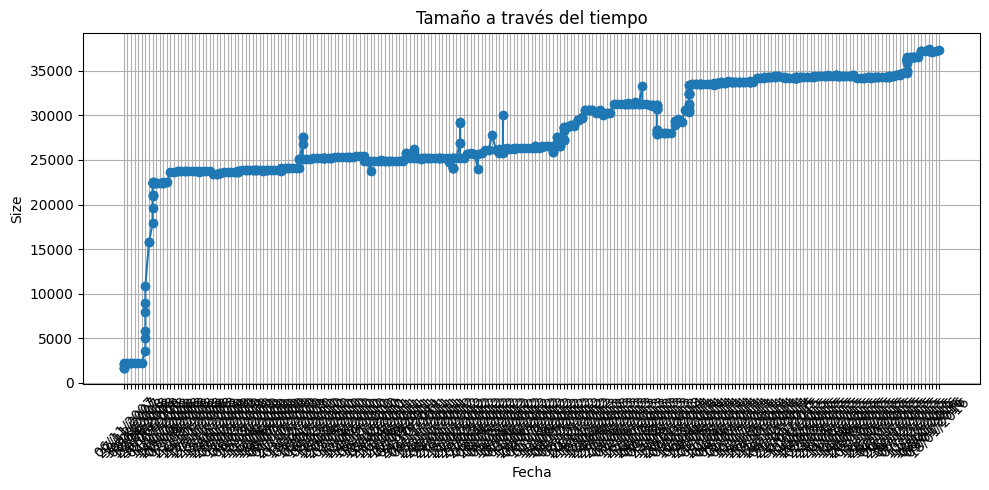

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(10, 5))
plt.plot(wikipedia_df['fecha_formateada'], wikipedia_df['size'], marker='o')

# Configurar el gráfico
plt.title('Tamaño a través del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Size')

# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Añadir cuadrícula
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

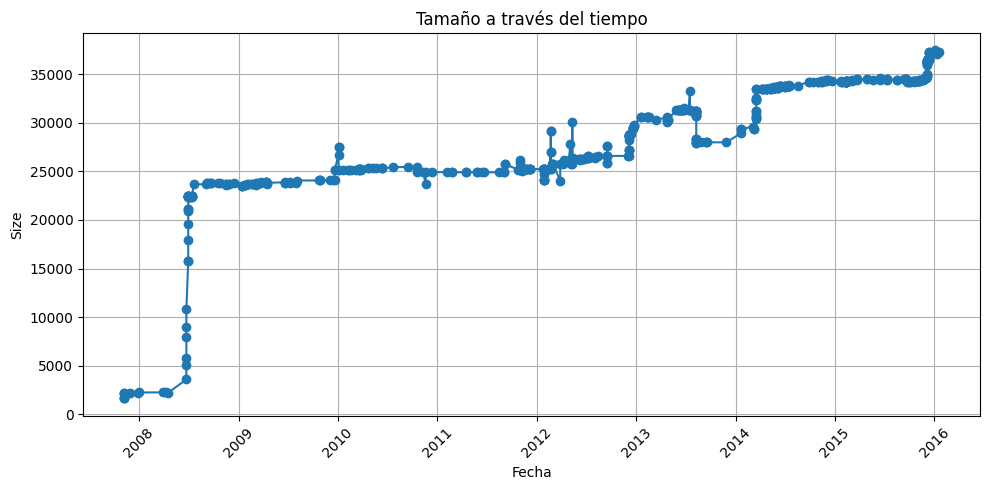

In [ ]:
# Gráfico solo indicando los años en el eje X
plt.figure(figsize=(10, 5))
plt.plot(wikipedia_df['timestamp'], wikipedia_df['size'], marker='o')

# Configurar el gráfico
plt.title('Tamaño a través del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Size')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Establecer localizador para los años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato para el año


# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Añadir cuadrícula
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()